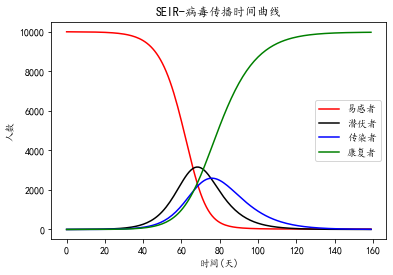

In [3]:
import math

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['KaiTi']

plt.rcParams['axes.unicode_minus'] = False

def calc(T):

    for i in range(0, len(T) - 1):

        S.append(S[i] - r * b * S[i] * I[i] / N )

        E.append(E[i] + r * b * S[i] * I[i] / N - a * E[i] )

        I.append(I[i] + a * E[i] - y * I[i])

        R.append(R[i] + y * I[i])

def plot(T,S,E,I,R):

    plt.figure()

    plt.title("SEIR-病毒传播时间曲线")

    plt.plot(T,S,color='r',label='易感者')

    plt.plot(T, E, color='k', label='潜伏者')

    plt.plot(T, I, color='b', label='传染者')

    plt.plot(T, R, color='g', label='康复者')

    plt.grid(False)

    plt.legend()

    plt.xlabel("时间(天)")

    plt.ylabel("人数")

    plt.show()

if __name__ == '__main__':

    # 首先还是设置一下参数,之后方便修改

    N = 10000 # 人口总数

    E = [] # 潜伏携带者

    E.append(0)

    I = [] # 传染者

    I.append(1)

    S = [] # 易感者

    S.append(N - I[0])

    R = [] # 康复者

    R.append(0)

    r = 20 # 传染者接触人数

    b = 0.03 # 传染者传染概率

    a = 0.1 # 潜伏者患病概率

    y = 0.1 # 康复概率

    T = [i for i in range(0, 160)] # 时间

    calc(T)

    plot(T,S,E,I,R)

In [ ]:
1、什么是SEIR模型

常见的传染病模型按照传染病类型分为SI、SIR、SIRS、SEIR 模型等，用于研究传染病的传播速度、空间范围、传播途径、动力学机理等问题，
以指导对传染病的有效地预防和控制。

首先介绍S、E、I、R几个重要的参数：

1、S 类：易感者 (Susceptible)，指未得病者，但缺乏免疫能力，与感染者接触后容易受到感染；在视频中，假设某区域的人口数为10000，
那么第一天的S=N-I=9999

2、E 类：暴露者 (Exposed)，指接触过感染者，但暂无能力传染给其他人的人，对潜伏期长的传染病适用；本例中第一天为0个。

3、I 类：感病者 (Infectious)，指染上传染病的人，可以传播给 S 类成员，将其变为 E 类或 I 类成员；本例中第一天为1个。

4、R 类：康复者 (Recovered)，指被隔离或因病愈而具有免疫力的人。如免疫期有限，R 类成员可以重新变为 S 类。本例中第一天为0个。

接下来看看图中的r、β、γ、α：

1、r：感染患者（I）每天接触的易感者数目，本例为20

2、β：传染系数；由疾病本身的传播能力，人群的防控能力决定，本例设置为0.03

3、γ：恢复系数；一般为病程的倒数，例如流感的病程5天的话，那么它的γ就是1/5，本例设置为0.1

4、α：潜伏者的发病概率；一般为潜伏期的倒数，本例为0.1

2、怎么理解SEIR模型


当dt=1时

St+1-St=-γβItSt/ N

Et+1-Et=γβItSt/ N-ɑEt

It+1-It=ɑEt-γIt

Rt+1-Rt=γIt

我们看流程图和公式，dS/dt可以理解为当时间t无限接近0时，S的变化量。当t=1时，dS/dt就是每日S的改变数，
其余的dE/dt、dI/dt、dR/dt同理。因为S是从一开始接近N，然后慢慢被感染成E，呈下降变化，所以第一条公式右边是带负号。

每天有多少S减少由每天发病人群接触人数（r）、传染系数（β）、发病人数的比例（I/N）、
易感人群的比例（S/N）、总人数（N）所决定的，所以dS/dt=-r*β*S/N*I/N*N=-rβSI/N。
那么每天E的改变数量dE/dt就是每天S转化为E的数目（rβSI/N）减去每天E转化为I的数目（rβSI/N-αE）。其余的dI/dt、dR/dt同理。